In [2]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Import wrangle
import wrangle

In [3]:
df = wrangle.prep()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13978 entries, 2019-04-16 19:34:42+00:00 to 2019-04-19 19:42:41+00:00
Data columns (total 7 columns):
ip                13978 non-null object
request_method    13978 non-null object
status            13978 non-null int64
size              13978 non-null int64
destination       25 non-null object
request_agent     13978 non-null object
size_mb           13978 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 873.6+ KB


In [5]:
df.head()

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,0.488753
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,0.003396
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,0.486472
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,0.486377
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,0.488246


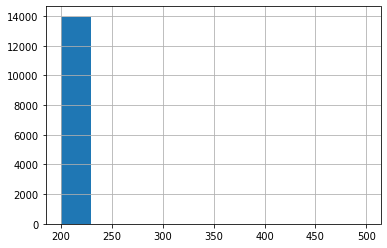

In [6]:
df.status.hist()

In [7]:
print("HTTP Status Codes, Frequency Count")
df.status.value_counts()

HTTP Status Codes, Frequency Count


200    13960
499       16
301        2
Name: status, dtype: int64

In [8]:
df[df.status == 301]

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-17 19:36:41+00:00,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,NaN,python-requests/2.21.0,0.000958
2019-04-18 19:42:41+00:00,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,NaN,python-requests/2.21.0,0.002441


In [9]:
df[df.status == 499]

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-16 19:55:15+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1,0.0
2019-04-16 19:56:02+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1,0.0
2019-04-16 20:28:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:33:24+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:38:13+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:38:55+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:39:00+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:45:17+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0
2019-04-16 20:45:28+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,0.0


In [11]:
df.request_agent = df.request_agent.str.strip()

In [12]:
df.request_agent.value_counts()

python-requests/2.21.0                                                                                                       12005
python-requests/2.20.1                                                                                                        1911
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36       34
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0                                               8
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)                                                                       7
Slackbot 1.0 (+https://api.slack.com/robots)                                                                                     6
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36        4
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gec

## What do we know so far?
- Most of the request go through just fine
- The vast majority of requests are coming from python scripts using the python-requests library

In [18]:
print("Size in MB, # of Requests")
df.size_mb.value_counts(bins=5)

Size in MB, # of Requests


(0.392, 0.784]       12318
(-0.00296, 0.392]     1658
(1.569, 1.961]           1
(0.784, 1.177]           1
(1.177, 1.569]           0
Name: size_mb, dtype: int64

In [25]:
# What's the range of dates we're looking at:
df.index.value_counts(sort=False, bins=10)

(2019-04-16 19:28:04.320999935, 2019-04-17 06:37:29.900000]    13903
(2019-04-17 06:37:29.900000, 2019-04-17 17:40:17.800000]          71
(2019-04-17 17:40:17.800000, 2019-04-18 04:43:05.700000]           1
(2019-04-18 04:43:05.700000, 2019-04-18 15:45:53.600000]           0
(2019-04-18 15:45:53.600000, 2019-04-19 02:48:41.500000]           1
(2019-04-19 02:48:41.500000, 2019-04-19 13:51:29.400000]           0
(2019-04-19 13:51:29.400000, 2019-04-20 00:54:17.300000]           1
(2019-04-20 00:54:17.300000, 2019-04-20 11:57:05.200000]           0
(2019-04-20 11:57:05.200000, 2019-04-20 22:59:53.100000]           0
(2019-04-20 22:59:53.100000, 2019-04-21 10:02:41]                  1
Name: timestamp, dtype: int64

In [8]:
# Looks like the vast majority of requests come in on Tuesday with some on Wednesday
df.groupby(df.index.dayofweek).agg(["count"])

,ip,request_method,status,size,destination,request_agent,size_mb
,count,count,count,count,count,count,count
timestamp,,,,,,,
1,11947,11947,11947,11947,22,11947,11947
2,2028,2028,2028,2028,3,2028,2028
3,1,1,1,1,0,1,1
4,1,1,1,1,0,1,1
6,1,1,1,1,0,1,1


## What else we've learned:
- Most requests between 0.327MB and 0.654MB
- Dataset doesn't include any Monday traffic
- Most traffic is on Tuesday (84%)
- Some traffic on Wednesday (16%)

In [26]:
df.request_method

timestamp
2019-04-16 19:34:42+00:00     GET /api/v1/sales HTTP/1.1 
2019-04-16 19:34:42+00:00     GET /api/v1/items HTTP/1.1 
2019-04-16 19:34:44+00:00     GET /api/v1/sales HTTP/1.1 
2019-04-16 19:34:46+00:00     GET /api/v1/sales HTTP/1.1 
2019-04-16 19:34:48+00:00     GET /api/v1/sales HTTP/1.1 
                                         ...             
2019-04-17 12:55:14+00:00     GET /api/v1/sales HTTP/1.1 
2019-04-21 10:02:41+00:00      GET /api/v1/items/HTTP/1.1
2019-04-17 19:36:41+00:00      GET /api/v1/sales/HTTP/1.1
2019-04-18 19:42:41+00:00      GET /api/v1/sales/HTTP/1.1
2019-04-19 19:42:41+00:00      GET /api/v1/sales/HTTP/1.1
Name: request_method, Length: 13978, dtype: object

In [28]:
df.request_method = df.request_method.str.strip()
df.request_method

timestamp
2019-04-16 19:34:42+00:00    GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:42+00:00    GET /api/v1/items HTTP/1.1
2019-04-16 19:34:44+00:00    GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:46+00:00    GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:48+00:00    GET /api/v1/sales HTTP/1.1
                                        ...            
2019-04-17 12:55:14+00:00    GET /api/v1/sales HTTP/1.1
2019-04-21 10:02:41+00:00    GET /api/v1/items/HTTP/1.1
2019-04-17 19:36:41+00:00    GET /api/v1/sales/HTTP/1.1
2019-04-18 19:42:41+00:00    GET /api/v1/sales/HTTP/1.1
2019-04-19 19:42:41+00:00    GET /api/v1/sales/HTTP/1.1
Name: request_method, Length: 13978, dtype: object

In [30]:
df.parts = df.request_method.str.split(" ")
df.parts

timestamp
2019-04-16 19:34:42+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:42+00:00    [GET, /api/v1/items, HTTP/1.1]
2019-04-16 19:34:44+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:46+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:48+00:00    [GET, /api/v1/sales, HTTP/1.1]
                                          ...              
2019-04-17 12:55:14+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-21 10:02:41+00:00     [GET, /api/v1/items/HTTP/1.1]
2019-04-17 19:36:41+00:00     [GET, /api/v1/sales/HTTP/1.1]
2019-04-18 19:42:41+00:00     [GET, /api/v1/sales/HTTP/1.1]
2019-04-19 19:42:41+00:00     [GET, /api/v1/sales/HTTP/1.1]
Name: request_method, Length: 13978, dtype: object

In [32]:
def get_first(some_list):
    return some_list[0]

In [33]:
# Determine the http method (expecting GET and/or POST)
# df["http_method"] = df.parts.apply(lambda x: x[0])
df["http_method"] = df.parts.apply(get_first)

In [35]:
df.http_method.value_counts()

GET    13978
Name: http_method, dtype: int64

In [36]:
# Isolate the request endpoint
df["endpoints"] = df.parts.apply(lambda x: x[1])

In [37]:
df.endpoints.value_counts()

/api/v1/sales                      12403
/api/v1/items                       1065
/api/v1/stores                       229
/                                    107
/documentation                       100
/favicon.ico                          26
/api/v1//api/v1/items                 11
/api/v1/items/api/v1/items             7
/api/v1/items/next_page                5
/api/v1/                               4
/api/v1/sales/HTTP/1.1                 3
/api/v1/sales/                         3
/api/v1/itemsitems                     3
/api/v1/store                          3
/api/v1items                           2
/api/v1/helloclass!                    1
/api/V1/HiZach!                        1
/api/v1/I_DIDNT_DO_IT!!!!              1
/api/v1/items&page=0                   1
/api/v1//api/v1/items/next_page        1
/api/v1                                1
/api/v1/items/HTTP/1.1                 1
Name: endpoints, dtype: int64